# Importing the data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import os
os.chdir("C:\\Users\\Adhvaidh\\Desktop\\ML DATASETS\\LOGISTIC REG")

In [2]:
datafeat = pd.read_csv('bank_train.csv', header=0)

# Checking for null values

In [3]:
datafeat.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [4]:
datafeat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,high.school,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,university.degree,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,basic.4y,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,university.degree,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,university.degree,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [5]:
dataY = pd.read_csv('bank_train_target.csv', header=None)
dataY.head()

,0
0,1
1,0
2,0
3,0
4,0


In [6]:
dataY.columns=['y']
dataY.head()

,y
0,1
1,0
2,0
3,0
4,0


#### Input variables

In [7]:
datafeat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27595 entries, 0 to 27594
Data columns (total 20 columns):
age               27595 non-null int64
job               27595 non-null object
marital           27595 non-null object
education         27595 non-null object
default           27595 non-null object
housing           27595 non-null object
loan              27595 non-null object
contact           27595 non-null object
month             27595 non-null object
day_of_week       27595 non-null object
duration          27595 non-null int64
campaign          27595 non-null int64
pdays             27595 non-null int64
previous          27595 non-null int64
poutcome          27595 non-null object
emp.var.rate      27595 non-null float64
cons.price.idx    27595 non-null float64
cons.conf.idx     27595 non-null float64
euribor3m         27595 non-null float64
nr.employed       27595 non-null float64
dtypes: float64(5), int64(5), object(10)
memory usage: 4.2+ MB


In [8]:
## Concatenating train feature and train label data
data=pd.concat([datafeat,dataY],axis=1)

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,26,student,single,high.school,no,no,no,telephone,jun,mon,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,1
1,46,admin.,married,university.degree,no,yes,no,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
2,49,blue-collar,married,basic.4y,unknown,yes,yes,telephone,jun,tue,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
3,31,technician,married,university.degree,no,no,no,cellular,jul,tue,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2,0
4,42,housemaid,married,university.degree,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [10]:
data['education'].value_counts()

university.degree      8128
high.school            6424
basic.9y               4065
professional.course    3502
basic.4y               2777
basic.6y               1526
unknown                1162
illiterate               11
Name: education, dtype: int64

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [11]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [12]:
data['education'].value_counts()

Basic                  8368
university.degree      8128
high.school            6424
professional.course    3502
unknown                1162
illiterate               11
Name: education, dtype: int64

### Data exploration

In [13]:
data['y'].value_counts()

0    24481
1     3114
Name: y, dtype: int64

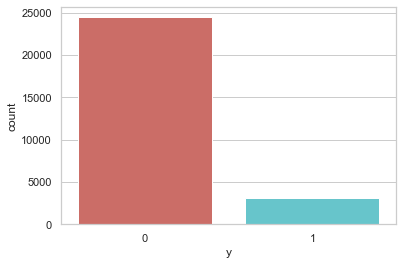

<Figure size 432x288 with 0 Axes>

In [14]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [15]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,27595.000000,27595.000000,27595.000000,27595.000000,27595.000000,27595.000000,27595.000000,27595.000000,27595.000000,27595.00000,27595.000000
mean,40.085994,258.874542,2.568328,962.693169,0.172024,0.087211,93.577443,-40.503026,3.628844,5167.31696,0.112847
std,10.480548,260.511236,2.765561,186.371948,0.492548,1.567343,0.578193,4.616641,1.730084,72.22960,0.316411
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.60000,0.000000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.10000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.00000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.10000,0.000000
max,94.000000,4199.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.10000,1.000000


Visualizations

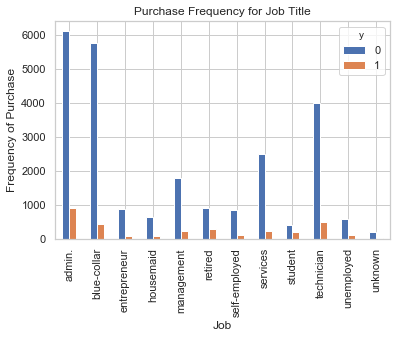

In [16]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [17]:
pd.crosstab(data.marital, data.y)

y,0,1
marital,,
divorced,2754,320
married,14993,1699
single,6685,1087
unknown,49,8


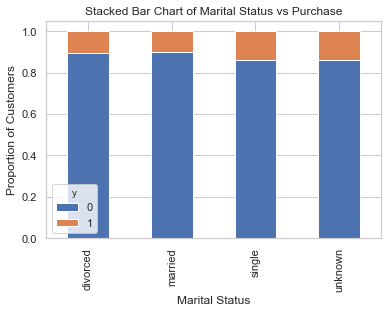

In [18]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

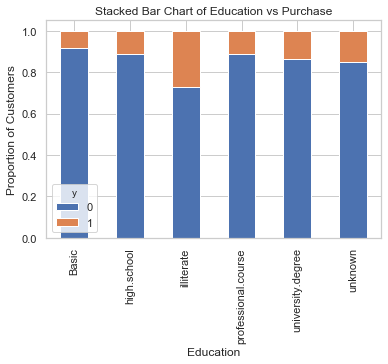

In [19]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

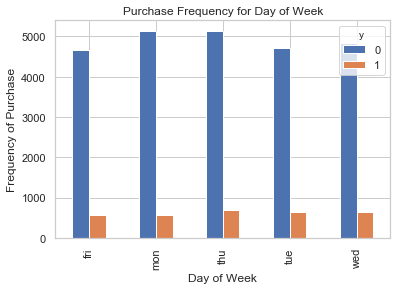

In [20]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

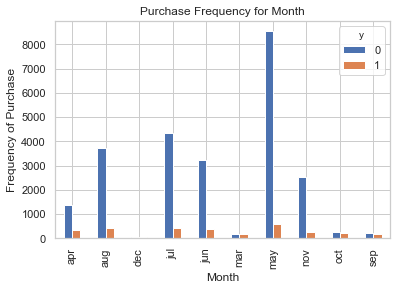

In [21]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

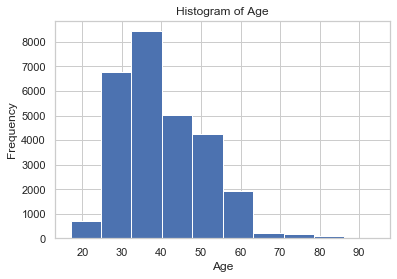

In [22]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

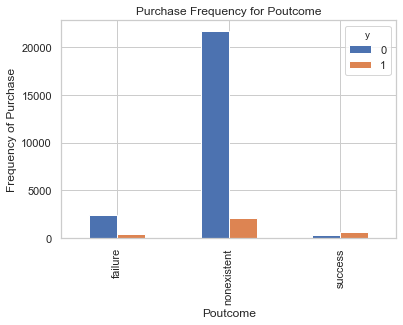

In [23]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

### Create dummy variables

In [24]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var,drop_first= True)
    data1=data.join(cat_list)
    data=data1

In [25]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [26]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

In [27]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

### Feature Selection

In [28]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Adhvaidh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Adhvaidh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Adhvaidh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC

[False False False False  True False False False  True False  True  True
 False False  True False  True  True False False False False False False
 False False False False False  True False False False False False  True
 False  True  True  True  True  True False  True False  True False False
 False  True  True]
[31 27 10 29  1 16 19 17  1 23  1  1  6 26  1  3  1  1 18 21 30  8  7 33
 20 28 22 12  2  1 34 15 24 11 14  1  9  1  1  1  1  1  5  1 25  1 32 13
  4  1  1]


C:\Users\Adhvaidh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
coldf=pd.DataFrame(X)
coldf.columns=['columns']
coldf['lableimp']=rfe.support_

In [30]:
coldf

,columns,lableimp
0,age,False
1,duration,False
2,campaign,False
3,pdays,False
4,previous,True
5,emp.var.rate,False
6,cons.price.idx,False
7,cons.conf.idx,False
8,euribor3m,True
9,nr.employed,False


In [31]:
coldf[coldf['lableimp']==True].shape

(18, 2)

In [32]:
coldf[coldf['lableimp']==True]['columns'].values

array(['previous', 'euribor3m', 'job_blue-collar', 'job_entrepreneur',
       'job_retired', 'job_services', 'job_student', 'default_unknown',
       'contact_telephone', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_oct', 'day_of_week_mon',
       'poutcome_nonexistent', 'poutcome_success'], dtype=object)

In [33]:
cols=['previous', 'euribor3m', 'job_blue-collar', 'job_entrepreneur',
       'job_retired', 'job_student', 'education_illiterate',
       'default_unknown', 'contact_telephone', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_sep',
       'day_of_week_mon', 'poutcome_nonexistent', 'poutcome_success'] 
X=data_final[cols]
y=data_final['y']

### Implementing the model

In [34]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.283674
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                27595
Model:                          Logit   Df Residuals:                    27577
Method:                           MLE   Df Model:                           17
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1951
Time:                        19:05:58   Log-Likelihood:                -7828.0
converged:                       True   LL-Null:                       -9725.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.2578      0.040     -6.467      0.000      -0.336      -0.180

### Logistic Regression Model Fitting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

#### Predicting the test set results and caculating the accuracy

In [36]:
y_pred = logreg.predict(X_test)

In [37]:
logreg.score(X_test, y_test)

0.8972098079478198

### Cross Validation

In [38]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Adhvaidh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.900


### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7258   87]
 [ 764  170]]


#### Accuracy

In [40]:
logreg.score(X_test, y_test)

0.8972098079478198

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7345
           1       0.66      0.18      0.29       934

    accuracy                           0.90      8279
   macro avg       0.78      0.59      0.62      8279
weighted avg       0.88      0.90      0.87      8279



In [42]:
from sklearn.metrics import roc_auc_score
# lets measure the logistic model AUC
logistic_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) 
logistic_roc_auc

0.5850840277949865

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

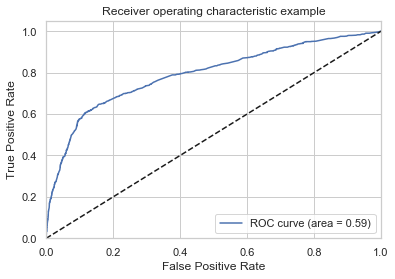

Logistic AUC = 0.59 


In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc ="lower right")
plt.show()
print("Logistic AUC = %2.2f " % logistic_roc_auc )